# TryYours - High Resolution Virtual Try On site using HR-VITON.
---
Demo for Virtual Try On website

# 1.Setup
- First, in the **Runtime** menu -> **Change runtime type**, make sure to have ```Hardware Accelerator = GPU```
- Clone repo and install dependencies.
- **It will take few minutes to finish installation**

In [9]:
pip install openai

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 217 kB 4.1 MB/s eta 0:00:01
  Using cached pydantic-2.4.2-py3-none-any.whl (395 kB)
     |████████████████████████████████| 75 kB 7.3 MB/s eta 0:00:011
  Using cached anyio-3.7.1-py3-none-any.whl (80 kB)
     |████████████████████████████████| 76 kB 7.4 MB/s eta 0:00:011
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Using cached pydantic_core-2.10.1-cp39-cp39-macosx_11_0_arm64.whl (1.7 MB)
     |████████████████████████████████| 58 kB 6.7 MB/s eta 0:00:01
  Attempting uninstall: anyio
    Found existing installation: anyio 4.0.0
    Uninstalling anyio-4.0.0:
      Successfully uninstalled anyio-4.0.0
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# clone repository

# install dependencies
pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
pip install scipy==1.8.0

%cd complete_Hr-vton
# install detectron2


Cloning into 'complete_Hr-vton'...
remote: Enumerating objects: 1105, done.
remote: Counting objects: 100% (1105/1105), done.
remote: Compressing objects: 100% (890/890), done.
remote: Total 1105 (delta 197), reused 1105 (delta 197), pack-reused 0
Receiving objects: 100% (1105/1105), 22.20 MiB | 21.05 MiB/s, done.
Resolving deltas: 100% (197/197), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Download Pre-trained Models

In [22]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

zsh:1: command not found: gdown


zsh:1: command not found: gdown
/


In [25]:
cd /Users/abdul/Documents/GitHub/Dresify/complete_Hr-vton

/Users/abdul/Documents/GitHub/Dresify/complete_Hr-vton


# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [27]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')


NameError: name 'files' is not defined

# 4. Upload Person Images
Either use sample images or upload your images

In [11]:
# Uncomment the following block if you would like to upload your own images.

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')


Saving man1.jpg to man1.jpg


In [22]:
import os
import shutil
from google.colab import files
import cv2
import matplotlib.pyplot as plt

input_dir = 'static'
uploaded = files.upload()

# Verify each uploaded file and then move it to the target directory
for filename in uploaded.keys():
  print(f"Processing {filename}")  # Diagnostic print
  input_path = os.path.join(input_dir, filename)
  if not os.path.exists(input_path):
    shutil.move(filename, input_path)
  else:
    print(f"File {input_path} already exists. Overwriting...")  # Diagnostic print

# Replace the existing 'cloth_web.jpg' with the new one
cloth_web_path = os.path.join(input_dir, 'cloth_web.jpg')
if os.path.exists(cloth_web_path):
  os.remove(cloth_web_path)
  print(f"Removed existing {cloth_web_path}")  # Diagnostic print

os.rename(input_path, cloth_web_path)
print(f"Renamed {input_path} to {cloth_web_path}")  # Diagnostic print



Saving cloth2.png to cloth2.png
Processing cloth2.png
Removed existing static/cloth_web.jpg
Renamed static/cloth2.png to static/cloth_web.jpg
An error occurred: Failed to read the image at /content/complete_Hr-vton/static/cloth_web.jpg


In [23]:
# Now, let's try to read and display the images
try:
  original_path = "/content/complete_Hr-vton/static/origin_web.jpg"
  cloth_path = "/content/complete_Hr-vton/static/cloth_web.jpg"

  original = cv2.imread(original_path)
  if original is None:
    raise ValueError(f"Failed to read the image at {original_path}")

  cloth = cv2.imread(cloth_path)
  if cloth is None:
    raise ValueError(f"Failed to read the image at {cloth_path}")

  # Convert BGR to RGB for displaying
  original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
  cloth = cv2.cvtColor(cloth, cv2.COLOR_BGR2RGB)

  # Display Images
  fig, axes = plt.subplots(nrows=1, ncols=2)
  dpi = fig.get_dpi()
  fig.set_size_inches(900 / dpi, 448 / dpi)
  plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
  axes[0].axis('off')
  axes[0].imshow(original)
  axes[1].axis('off')
  axes[1].imshow(cloth)
  plt.show()

except Exception as e:
  print(f"An error occurred: {e}")


An error occurred: Failed to read the image at /content/complete_Hr-vton/static/cloth_web.jpg


# 5. Check Images
check image uploaded successfully

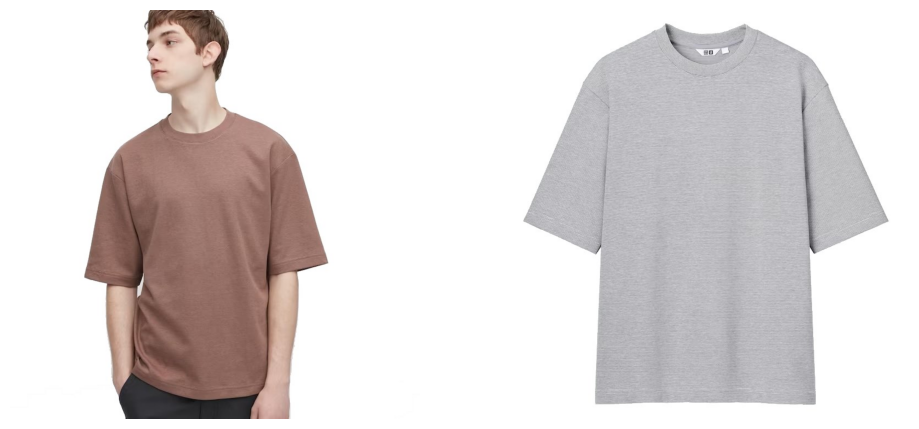

In [21]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("/content/complete_Hr-vton/static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("/content/complete_Hr-vton/static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [9]:
!python main.py --background False

[ WARN:0@4.335] global loadsave.cpp:248 findDecoder imread_('./static/origin_web.jpg'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  File "/content/complete_Hr-vton/main.py", line 17, in <module>
    ori_img=cv2.resize(img,(768,1024))
cv2.error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# 7. View Results

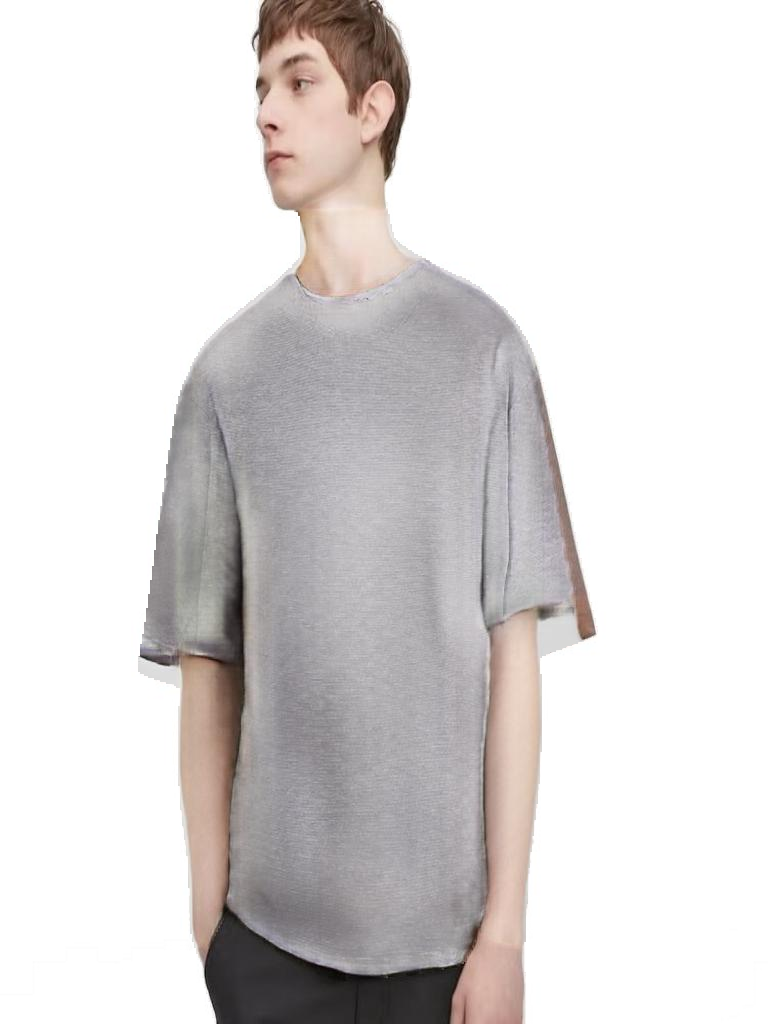

In [23]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)

# We will add Website code later. Enjoy the code!